In [1]:
import os
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog,DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import glob
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt

In [2]:
register_coco_instances("train_dataset",{},"dataset/coco/train/coco_annotations.json","dataset/coco/train")
register_coco_instances("test_dataset",{},"dataset/coco/test/coco_annotations.json","dataset/coco/test")


In [3]:
train_metadata = MetadataCatalog.get("train_dataset")
train_dataset_dict = DatasetCatalog.get("train_dataset")

In [4]:
cfg = get_cfg()
cfg.OUTPUT_DIR = "saved_models/detectron2"
cfg.set_new_allowed(True)
cfg.merge_from_file(os.path.join(cfg.OUTPUT_DIR,"config.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,"model_final.pth")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0001
cfg.SOLVER.MAX_ITER = 1000  
cfg.SOLVER.STEPS = []        
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  

predictor = DefaultPredictor(cfg)

Loading config saved_models/detectron2/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [5]:
evaluator = COCOEvaluator("test_dataset")

In [6]:
test_loader = build_detection_test_loader(cfg,"test_dataset")
inference_on_dataset(predictor.model,test_loader,evaluator)


/opt/miniconda/envs/remover/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.031
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.

OrderedDict([('bbox',
              {'AP': 0.12565561000473335,
               'AP50': 0.5098408470781788,
               'AP75': 0.008850477724249638,
               'APs': 0.0,
               'APm': 0.633066005704204,
               'APl': 0.901684160259424}),
             ('segm',
              {'AP': 0.01614058322046814,
               'AP50': 0.0830718771209824,
               'AP75': 0.0,
               'APs': 0.0,
               'APm': 0.002282307054137621,
               'APl': 0.6571402786817134})])

In [7]:
val_path = 'dataset/coco/val_x'
val_images = []
for path in glob.glob(val_path + '/*'):
    val_images.append(path)

In [23]:
import cv2
image = cv2.imread( val_images[10] )
outputs = predictor(image)
filter = [i for i,score in enumerate(outputs['instances'].scores) if score > 0.1]
outputs['instances'] = outputs['instances'][filter]

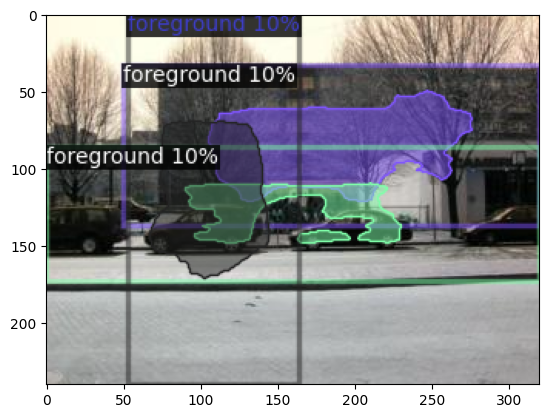

In [24]:
v = Visualizer(image[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.imshow(image[:, :, ::-1])
plt.imshow(out.get_image()[:, :, ::-1])